In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Add 'overweight' column
df['overweight'] = df.apply(lambda x: 1 if x['weight']/(x['height'] ** 2) > 25 else 0, axis=1)


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df.apply(lambda x: 0 if x['cholesterol'] == 1 else 1, axis=1)
df['gluc'] = df.apply(lambda x: 0 if x['gluc'] == 1 else 1, axis=1)

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,0


DRAW CAT PLOT

In [5]:
# I will create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

# Drop columns I do not need in a new dataframe to be worked on
melt_sample = df.drop(columns=['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo'])

# Melt my new dataframe while keeping the value of cardio
melted_df = pd.melt(melt_sample, id_vars=['id', 'cardio'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

df_cat = melted_df.groupby(['variable', 'value', 'cardio',]).size().unstack(fill_value=0)

df_cat

cardio                 0      1
variable    value              
active      0       6378   7361
            1      28643  27618
alco        0      33080  33156
            1       1941   1823
cholesterol 0      29330  23055
            1       5691  11924
gluc        0      30894  28585
            1       4127   6394
overweight  0      35021  34979
smoke       0      31781  32050
            1       3240   2929

Text(0, 0.5, 'total')

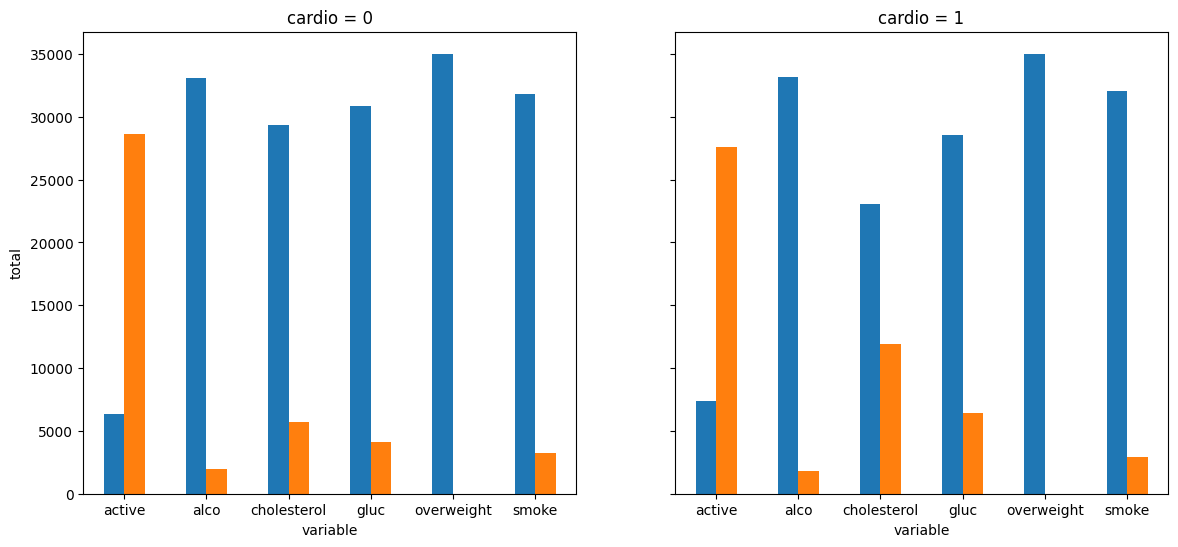

In [6]:
# Draw the catplot with 'sns.catplot()'
# Create the two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for cardio = 0 (Trend)
cardio_0 = df_cat[0].unstack()  # dataframe for cardio = 0
cardio_0.plot(kind='bar', ax=axes[0], legend=False)
axes[0].set_title('cardio = 0')
axes[0].tick_params(axis='x', rotation=0)  # Set x-axis label rotation

# Plot for cardio = 0 (Trend)
cardio_1 = df_cat[1].unstack()  # dataframe for cardio = 1
cardio_1.plot(kind='bar', ax=axes[1], legend=False)
axes[1].set_title('cardio = 1')
axes[1].tick_params(axis='x', rotation=0)  # Set x-axis label rotation

axes[0].set_ylabel('total')

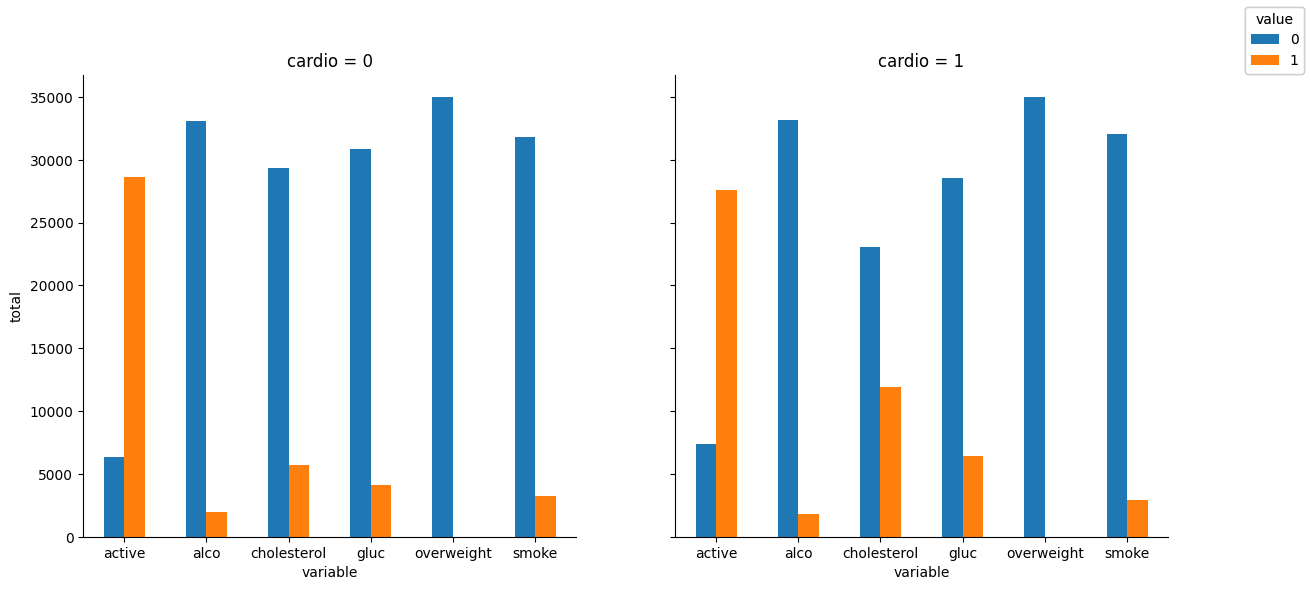

<Figure size 640x480 with 0 Axes>

In [9]:
# Remove the box around the plot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Create a common legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='value', loc='upper right')
# Adjust layout to remove any gap between subplots
plt.subplots_adjust(wspace=0.05)

fig

DRAW HEAT MAP

In [11]:
# Clean the data
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

# Calculate the correlation matrix
corr = df_heat.corr()

corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,NaN
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,NaN
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,NaN
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,NaN
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,NaN
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,NaN
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,NaN
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,NaN
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,NaN
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,NaN


In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<Axes: >

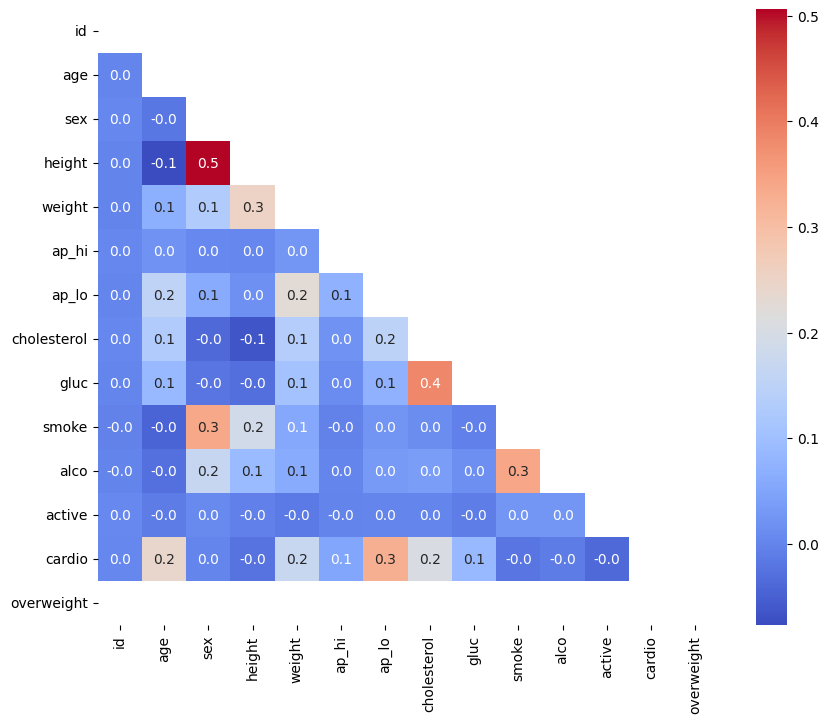

In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".1f")